In [38]:
import numpy as np
from sympy.solvers import solve
from sympy import Symbol
import sympy

import matplotlib.pyplot as plt

#### Реализовать явный метод Эйлера

In [100]:
def euler_method(f, t0, tn, tau, y0):
    
    eps = tau / 10000
    
    while t0 < tn and abs(t0 - tn) > eps:
        
        y0 += tau * f(t0, y0)
        
        t0 += tau
    
    return y0
    

##### Euler method testing 
Function: $y'(t) = t\sqrt{y(t)}$ \
Initials: $t_0=0, \ y_0=y(t_0)=y(0)=1$ \
Step: $\tau=0.1$

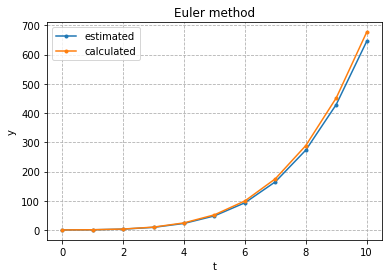

t = 0:
	Estimated: 1.0
	Calculated: 1.0

t = 1:
	Estimated: 1.493026926071482
	Calculated: 1.5625

t = 2:
	Estimated: 3.7253006252191803
	Calculated: 4.0

t = 3:
	Estimated: 9.769699359640672
	Calculated: 10.5625

t = 4:
	Estimated: 23.170150464508037
	Calculated: 25.0

t = 5:
	Estimated: 48.95859594975145
	Calculated: 52.5625

t = 6:
	Estimated: 93.66259813508545
	Calculated: 100.0

t = 7:
	Estimated: 165.30803696733486
	Calculated: 175.5625

t = 8:
	Estimated: 273.4200956195112
	Calculated: 289.0

t = 9:
	Estimated: 429.0236521808515
	Calculated: 451.5625

t = 10:
	Estimated: 644.6434484455102
	Calculated: 676.0



In [102]:
t = np.arange(0, 11, 1, int)
y1 = np.array([euler_method(lambda t, y: t * y ** 0.5, 0, i, 0.1, 1) for i in t])
y2 = (t ** 2 + 4) ** 2 / 16

plt.plot(t, y1, label='estimated', marker='.')
plt.plot(t, y2, label='calculated', marker='.')
plt.grid(linestyle='--')

plt.title("Euler method")
plt.xlabel('t')
plt.ylabel('y')

plt.legend()

plt.show()

for _t, _y1, _y2 in zip(t, y1, y2):
    print(f"t = {_t}:\n\tEstimated: {_y1}\n\tCalculated: {_y2}\n")


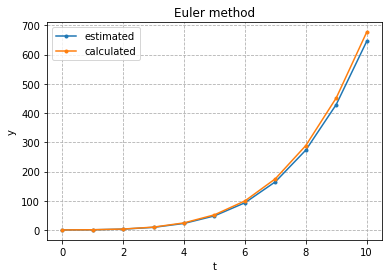

t = 0:
	Estimated: 1
	Calculated: 1.0

t = 1:
	Estimated: 1.493026926071482
	Calculated: 1.5625

t = 2:
	Estimated: 3.7253006252191803
	Calculated: 4.0

t = 3:
	Estimated: 9.769699359640667
	Calculated: 10.5625

t = 4:
	Estimated: 23.170150464508023
	Calculated: 25.0

t = 5:
	Estimated: 48.958595949751405
	Calculated: 52.5625

t = 6:
	Estimated: 93.66259813508539
	Calculated: 100.0

t = 7:
	Estimated: 165.30803696733483
	Calculated: 175.5625

t = 8:
	Estimated: 273.42009561951136
	Calculated: 289.0

t = 9:
	Estimated: 429.02365218085185
	Calculated: 451.5625

t = 10:
	Estimated: 644.6434484455109
	Calculated: 676.0



In [104]:
t = np.arange(0, 11, 1, int)
y1 = [euler_method(lambda t, y: t * y ** 0.5, 0, t[0], 0.1, 1)]

for i in range(1, len(t)):
    y1 += [euler_method(lambda t, y: t * y ** 0.5, t[i - 1], t[i], 0.1, y1[-1])]

y2 = (t ** 2 + 4) ** 2 / 16

plt.plot(t, y1, label='estimated', marker='.')
plt.plot(t, y2, label='calculated', marker='.')
plt.grid(linestyle='--')

plt.title("Euler method")
plt.xlabel('t')
plt.ylabel('y')

plt.legend()

plt.show()

for _t, _y1, _y2 in zip(t, y1, y2):
    print(f"t = {_t}:\n\tEstimated: {_y1}\n\tCalculated: {_y2}\n")


##### Implicit Euler method testing 
Function: $y'(t) = t\sqrt{y(t)}$ \
Initials: $t_0=0, \ y_0=y(t_0)=y(0)=1$ \
Step: $\tau=0.1$

#### Реализовать неявный метод Эйлера

In [105]:
def implicit_euler_method(f, t0, tn, tau, y0):
    
    eps = tau / 10000
    
    while t0 + tau < tn and abs(tn - t0) > eps:
        
        t0 += tau
        y = Symbol('y')
        
        y0 = solve(y - tau * f(t0, y) - y0, y)[0]
        
    return y0
    

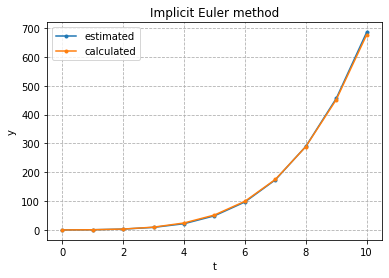

t = 0:
	Estimated: 1
	Calculated: 1.0

t = 1:
	Estimated: 1.63637941363373
	Calculated: 1.5625

t = 2:
	Estimated: 3.88307411195060
	Calculated: 4.0

t = 3:
	Estimated: 9.76102738376157
	Calculated: 10.5625

t = 4:
	Estimated: 22.4251905666439
	Calculated: 25.0

t = 5:
	Estimated: 49.7832752173733
	Calculated: 52.5625

t = 6:
	Estimated: 97.5608071867790
	Calculated: 100.0

t = 7:
	Estimated: 174.231581453155
	Calculated: 175.5625

t = 8:
	Estimated: 289.769678103550
	Calculated: 289.0

t = 9:
	Estimated: 455.649347279045
	Calculated: 451.5625

t = 10:
	Estimated: 684.844952047845
	Calculated: 676.0



In [122]:
t = np.arange(0, 11, 1, int)
y1 = [implicit_euler_method(lambda t, y: t * y ** 0.5, 0, t[0], 0.1, 1)]

for i in range(1, len(t)):
    y1 += [implicit_euler_method(lambda t, y: t * y ** 0.5, t[i - 1], t[i], 0.1, y1[-1])]

y2 = (t ** 2 + 4) ** 2 / 16

plt.plot(t, y1, label='estimated', marker='.')
plt.plot(t, y2, label='calculated', marker='.')
plt.grid(linestyle='--')

plt.title("Implicit Euler method")
plt.xlabel('t')
plt.ylabel('y')

plt.legend()

plt.show()

for _t, _y1, _y2 in zip(t, y1, y2):
    print(f"t = {_t}:\n\tEstimated: {_y1}\n\tCalculated: {_y2}\n")


#### Реализовать метод Рунге-Кутты 4 порядка

In [118]:
def runge_kutta(f, t0, tn, tau, y0):
    
    eps = tau / 10000
    
    while t0 < tn and (tn - t0) > eps:
        
        k1 = f(t0, y0)
        k2 = f(t0 + tau / 2, y0 + tau * k1 / 2)
        k3 = f(t0 + tau / 2, y0 + tau * k2 / 2)
        k4 = f(t0 + tau, y0 + tau * k3)
        
        y0 += tau / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        t0 += tau
        
    return y0

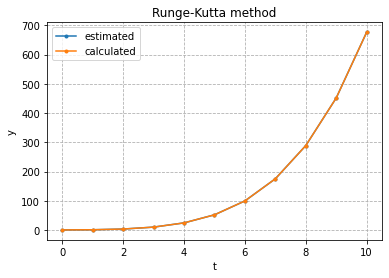

t = 0:
	Estimated: 1
	Calculated: 1.0

t = 1:
	Estimated: 1.562499854278108
	Calculated: 1.5625

t = 2:
	Estimated: 3.9999990805208006
	Calculated: 4.0

t = 3:
	Estimated: 10.562497090437557
	Calculated: 10.5625

t = 4:
	Estimated: 24.99999376509064
	Calculated: 25.0

t = 5:
	Estimated: 52.56248918030258
	Calculated: 52.5625

t = 6:
	Estimated: 99.99998340540358
	Calculated: 100.0

t = 7:
	Estimated: 175.5624764822712
	Calculated: 175.5625

t = 8:
	Estimated: 288.9999684347984
	Calculated: 289.0

t = 9:
	Estimated: 451.56245927683943
	Calculated: 451.5625

t = 10:
	Estimated: 675.9999490167093
	Calculated: 676.0



In [123]:
t = np.arange(0, 11, 1, int)
y1 = [runge_kutta(lambda t, y: t * y ** 0.5, 0, t[0], 0.1, 1)]

for i in range(1, len(t)):
    
    y1 += [runge_kutta(lambda t, y: t * y ** 0.5, t[i - 1], t[i], 0.1, y1[-1])]

y2 = (t ** 2 + 4) ** 2 / 16

plt.plot(t, y1, label='estimated', marker='.')
plt.plot(t, y2, label='calculated', marker='.')
plt.grid(linestyle='--')

plt.title("Runge-Kutta method")
plt.xlabel('t')
plt.ylabel('y')

plt.legend()

plt.show()

for _t, _y1, _y2 in zip(t, y1, y2):
    print(f"t = {_t}:\n\tEstimated: {_y1}\n\tCalculated: {_y2}\n")
